In [519]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from PToolkit import Plotter, Dataframe_to_latex
from numpy.fft import fft
from TN_code import TISTNplot as TN
from scipy.signal import find_peaks
p = Plotter()
%matplotlib inline



In [520]:
GOLFLENGTE = 532e-9

In [521]:
df = pd.read_csv("Data.csv")
pH = np.array(df["pH"])
time = np.array(df["time"], dtype=np.datetime64)

start = 500
time = time[start:]
pH = pH[start:]


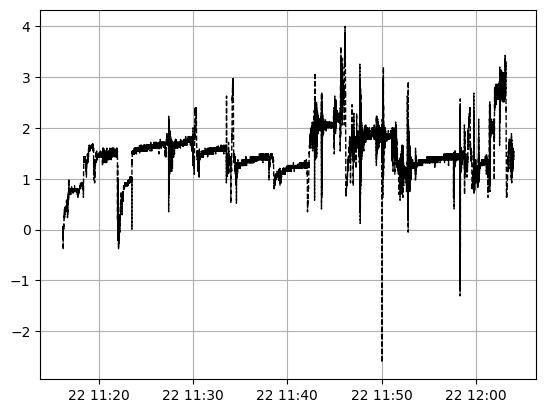

In [522]:
plt.plot(time, pH)
plt.show()

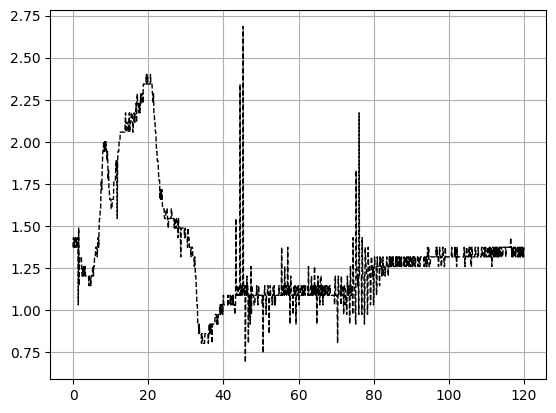

In [523]:
tracer1_data = pd.read_csv("Data/tracer_data_1.csv") # 255
tracer2_data = pd.read_csv("Data/tracer_data_2.csv") # 225
tracer3_data = pd.read_csv("Data/tracer_data_3.csv") # 200
tracer4_data = pd.read_csv("Data/tracer_data_4.csv") # 175
tracer5_data = pd.read_csv("Data/tracer_data_5.csv") # 150
tracer6_data = pd.read_csv("Data/tracer_data_6.csv") # 200
tracer7_data = pd.read_csv("Data/tracer_data_7.csv") # 200
datasets = [tracer1_data, tracer2_data, tracer3_data, tracer4_data, tracer5_data, tracer6_data, tracer7_data]

index = 5
y = np.array(datasets[index]["pH"])
#y[y > 1.4] = 1.4
x = np.array(datasets[index]["time"], dtype=np.datetime64)
x = (x - x[0])/np.timedelta64(1, "s")
plt.plot(x, y)
plt.show()

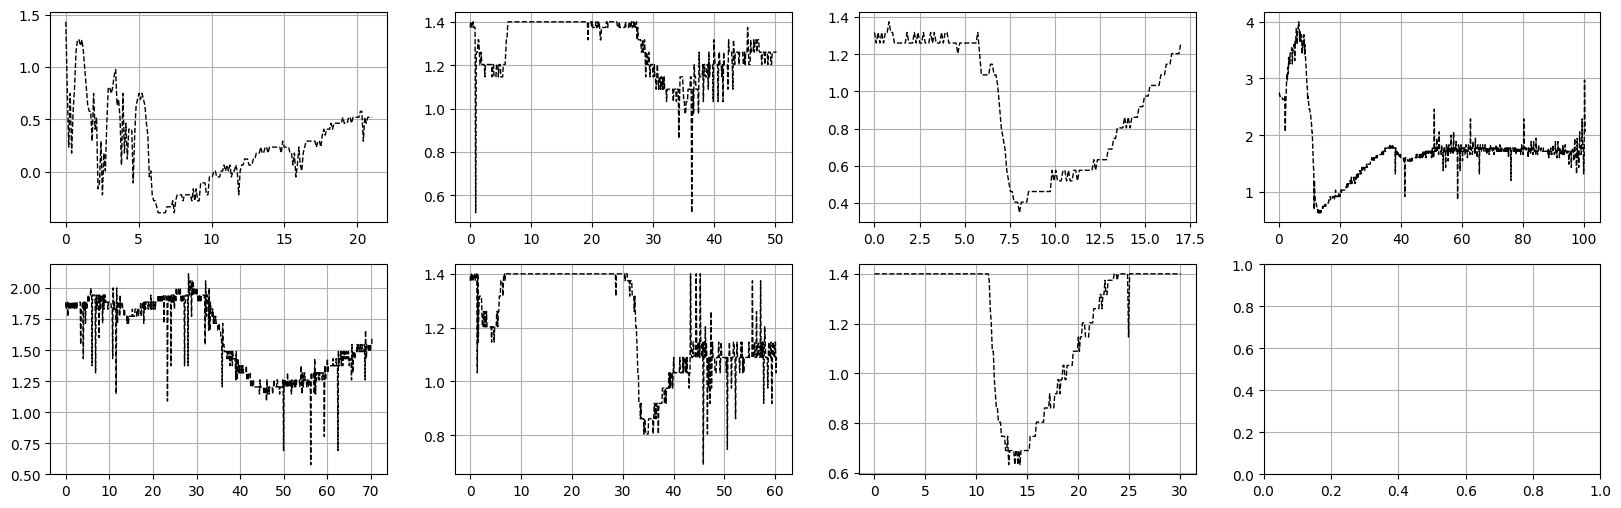

In [524]:

slice_max = np.array([21, 50, 17, 100, 70, 60, 30])*10


time1 = np.array(tracer1_data["time"], dtype=np.datetime64)[:slice_max[0]]
time2 = np.array(tracer2_data["time"], dtype=np.datetime64)[:slice_max[1]]
time3 = np.array(tracer3_data["time"], dtype=np.datetime64)[:slice_max[2]]
time4 = np.array(tracer4_data["time"], dtype=np.datetime64)[:slice_max[3]]
time5 = np.array(tracer5_data["time"], dtype=np.datetime64)[:slice_max[4]]
time6 = np.array(tracer6_data["time"], dtype=np.datetime64)[:slice_max[5]]
time7 = np.array(tracer7_data["time"], dtype=np.datetime64)[:slice_max[6]]


time1 = (time1 - time1[0])/np.timedelta64(1, "s")
time2 = (time2 - time2[0])/np.timedelta64(1, "s")
time3 = (time3 - time3[0])/np.timedelta64(1, "s")
time4 = (time4 - time4[0])/np.timedelta64(1, "s")
time5 = (time5 - time5[0])/np.timedelta64(1, "s")
time6 = (time6 - time6[0])/np.timedelta64(1, "s")
time7 = (time7 - time7[0])/np.timedelta64(1, "s")


pH1 = np.array(tracer1_data["pH"])[:slice_max[0]]
pH2 = np.array(tracer2_data["pH"])[:slice_max[1]]
pH3 = np.array(tracer3_data["pH"])[:slice_max[2]]
pH4 = np.array(tracer4_data["pH"])[:slice_max[3]]
pH5 = np.array(tracer5_data["pH"])[:slice_max[4]]
pH6 = np.array(tracer6_data["pH"])[:slice_max[5]]
pH7 = np.array(tracer7_data["pH"])[:slice_max[6]]

# Correctie voor luchtbellen
pH2[pH2 > 1.4] = 1.4
pH6[pH6 > 1.4] = 1.4
pH7[pH7 > 1.4] = 1.4

fig, ax = plt.subplots(2, 4, figsize=(20, 6))
ax = ax.flatten()

ax[0].plot(time1, pH1)
ax[1].plot(time2, pH2)
ax[2].plot(time3, pH3)
ax[3].plot(time4, pH4)
ax[4].plot(time5, pH5)
ax[5].plot(time6, pH6)
ax[6].plot(time7, pH7)
plt.show()

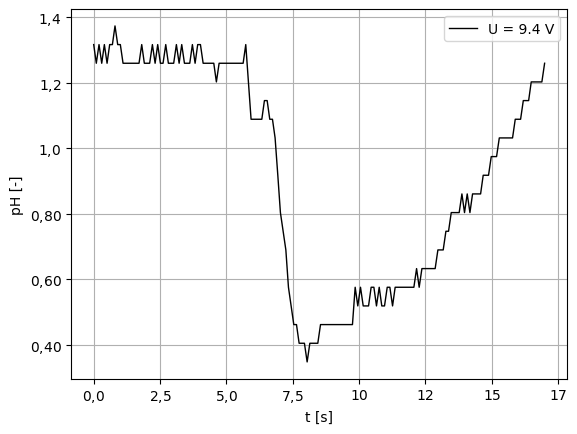

In [525]:
fig2, ax2 = plt.subplots()
formatterX = TN.TNFormatter(2)
formatterY = TN.TNFormatter(2)
ax2.yaxis.set_major_formatter(formatterY)
ax2.xaxis.set_major_formatter(formatterX)
ax2.plot(time3, pH3, linestyle="-", label="U = 9.4 V")

ax2.set_xlabel("t [s]")
ax2.set_ylabel("pH [-]")
ax2.legend(loc=0)
fig2.savefig("Figuren/Typical tracer curve.png")
plt.show()

     Voltage  \overline{t}  sigma_array  Expected frequency
0  10.588235      0.112313    14.613977         4333.103993
1   8.235294      0.080625    26.644997         3110.545602
2   7.058824      0.067825    17.207471         2616.715863
3   9.411765      0.086352    16.594972         3331.516745


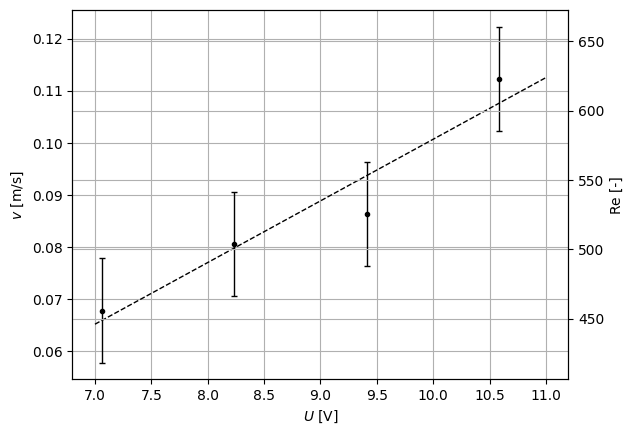

In [526]:
concentration1 = 10**(-pH1)
concentration2 = 10**(-pH2)
concentration3 = 10**(-pH3)
concentration4 = 10**(-pH4)
concentration5 = 10**(-pH5)
concentration6 = 10**(-pH6)
concentration7 = 10**(-pH7)

t1 = np.trapz(time1*concentration1)/np.trapz(concentration1)
t2 = np.trapz(time2*concentration2)/np.trapz(concentration2)
t3 = np.trapz(time3*concentration3)/np.trapz(concentration3)
t4 = np.trapz(time4*concentration4)/np.trapz(concentration4)
t5 = np.trapz(time5*concentration5)/np.trapz(concentration5)
t6 = np.trapz(time6*concentration6)/np.trapz(concentration6)
t7 = np.trapz(time7*concentration7)/np.trapz(concentration7)

sigma1 = np.sqrt(np.trapz(time1**2*concentration1)/np.trapz(concentration1) - t1**2)
sigma2 = np.sqrt(np.trapz(time2**2*concentration2)/np.trapz(concentration2) - t2**2)
sigma3 = np.sqrt(np.trapz(time3**2*concentration3)/np.trapz(concentration3) - t3**2)
sigma4 = np.sqrt(np.trapz(time4**2*concentration4)/np.trapz(concentration4) - t4**2)
sigma5 = np.sqrt(np.trapz(time5**2*concentration5)/np.trapz(concentration5) - t5**2)
sigma6 = np.sqrt(np.trapz(time6**2*concentration6)/np.trapz(concentration6) - t6**2)
sigma7 = np.sqrt(np.trapz(time7**2*concentration7)/np.trapz(concentration7) - t7**2)

L = 3
sigma_array = np.array([sigma2, sigma4, sigma5, sigma6])
speed_array = L/np.array([t2, t4, t5, t6])
duty_cycle = np.array([225, 175, 150, 200])

voltage = duty_cycle/255*12



fig, ax = plt.subplots()
ax.set_ylabel("$v$ [m/s]")
ax.set_xlabel("$U$ [V]")
axs = ax.twinx()


fit = linregress(voltage, speed_array)

p = np.linspace(7, 11, 400)
Re = speed_array*0.006*1000/0.0010016
angle = np.radians(np.arctan(100/150))

freq = speed_array*2*np.sin(angle)/GOLFLENGTE
D = {"Voltage": voltage, "\overline{t}": speed_array, "sigma_array": sigma_array, "Expected frequency": freq}
dataframe = pd.DataFrame(D)
print(dataframe)
axs.set_ylim(min(Re), max(Re))
axs.set_ylabel("Re [-]")
ax.plot(p, fit[0]*p+fit[1], label="Fit")
ax.errorbar(voltage, speed_array, yerr=0.01, label="Gemeten flow rate", fmt=".")
fig.savefig("Figuren/pomp cal.png")
plt.show()

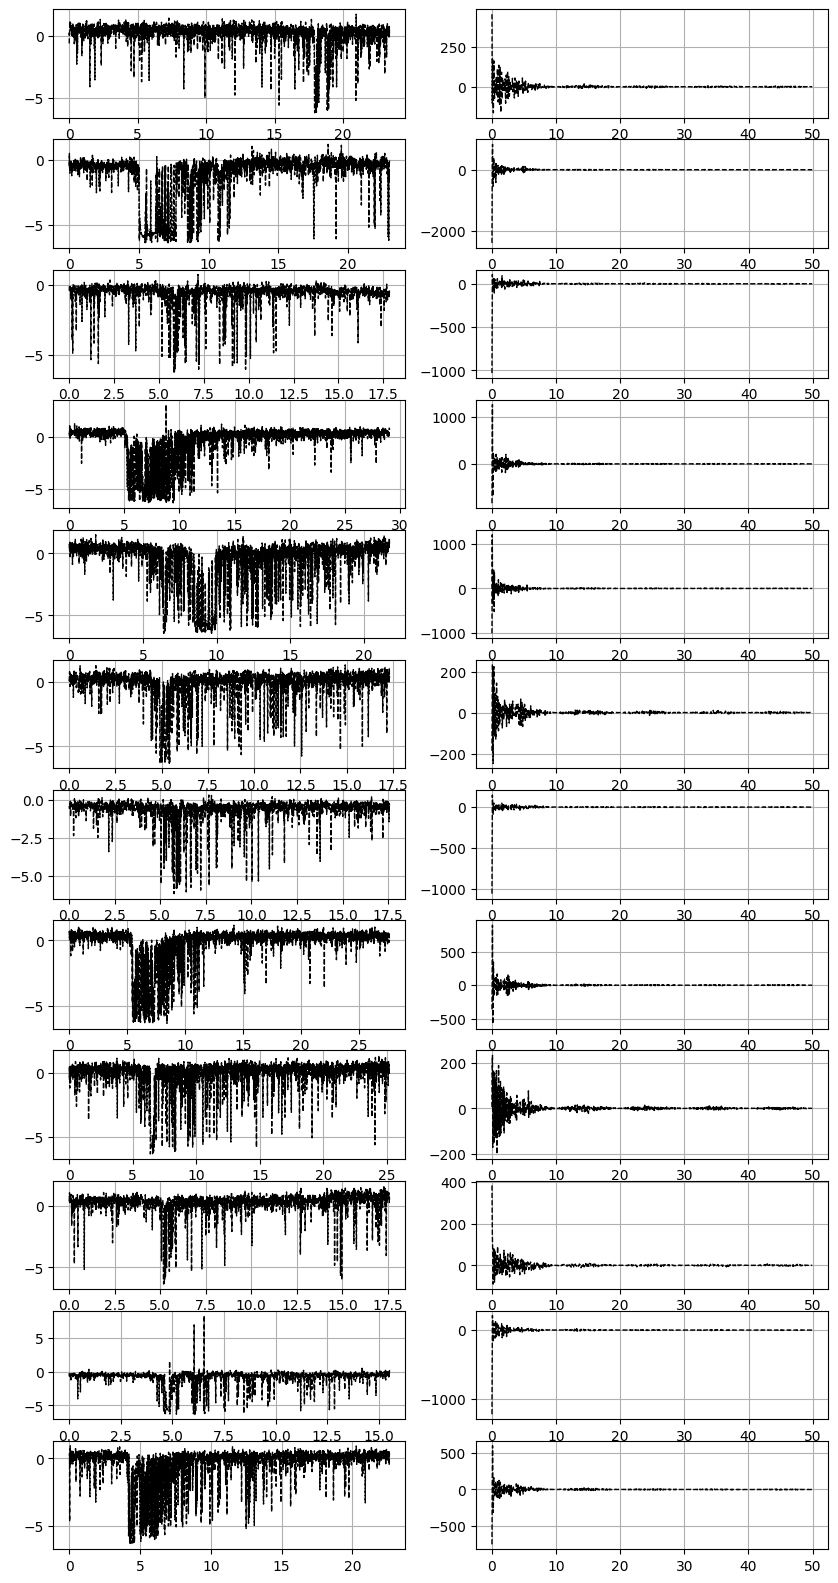

In [527]:
file_list = [
    "Data/Meeting1 (175).txt",
    "Data/Meeting1 (200).txt",
    "Data/Meeting1 (225).txt",
    "Data/Meeting1 (255).txt",
    "Data/Meeting2 (175).txt",
    "Data/Meeting2 (200).txt",
    "Data/Meeting2 (225).txt",
    "Data/Meeting2 (255).txt",
    "Data/Meeting3 (175).txt",
    "Data/Meeting3 (200).txt",
    "Data/Meeting3 (225).txt",
    "Data/Meeting3 (255).txt"
]
fig, ax = plt.subplots(len(file_list), 2,  figsize=(10, 20))
for i in range(0, len(file_list)):
    df = pd.read_csv(file_list[i], delimiter="\t")
    spanning = np.array(df["spanning "])
    tijd = np.array(df["time "])
    box_pts = 10
    box = np.ones(box_pts)/box_pts
    smooth = np.convolve(spanning, box, mode="same")
    smooth_fft = np.real(fft(smooth))
    spanning_fft = np.real(fft(spanning))
    freq = np.fft.fftfreq(tijd.size, d=0.01)
    ax[i][0].plot(tijd, spanning)
    ax[i][0].plot(tijd, smooth)
    ax[i][1].plot(freq[:int(len(smooth_fft)/2)], smooth_fft[:int(len(smooth_fft)/2)])
    #ax[i][1].plot(freq[:int(len(spanning_fft)/2)], smooth_fft[:int(len(spanning_fft)/2)])
    
    

In [528]:
df = pd.read_csv("Data/l.csv")
v = df["Channel 1 Ave. (V)"].to_numpy()
t = df["Unnamed: 0"].to_numpy()
t_convert = []
#plt.plot(t, v)
#plt.show()
from datetime import datetime, timedelta

audio_timestamp = '00:00:16,260'
(datetime.strptime(audio_timestamp+'000', '%H:%M:%S,%f') - datetime.strptime('00', '%H')).total_seconds()*1000

t

array(['00:00:00.000', '00:00:00.001', '00:00:00.002', ...,
       '00:01:00.678', '00:01:00.679', '00:01:00.680'], dtype=object)

In [529]:
df = pd.read_csv("Data/test1.csv", sep=",")
df

,1,2,t,V,5
NaN,NaN,NaN,-0.04928,0.144,NaN
NaN,NaN,NaN,-0.04924,0.156,NaN
NaN,NaN,NaN,-0.04920,0.160,NaN
NaN,NaN,NaN,-0.04916,0.152,NaN
NaN,NaN,NaN,-0.04912,0.176,NaN
...,...,...,...,...,...
NaN,NaN,NaN,0.04980,0.152,NaN
NaN,NaN,NaN,0.04984,0.152,NaN
NaN,NaN,NaN,0.04988,0.152,NaN
NaN,NaN,NaN,0.04992,0.160,NaN


In [530]:
phi = 14e-6
D = 9e-3
A = np.pi*(D/2)**2
v = phi/A

d = 80.2-71.3
x = 3/2
a = np.radians(np.arctan(x/d))
print(2*v*np.sin(a)/(GOLFLENGTE))

V = df["V"].to_numpy()
t = df["t"].to_numpy()


box_pts = 100
box = np.ones(box_pts)/box_pts
smooth = np.convolve(V, box, mode="same")


2410.9440862656425


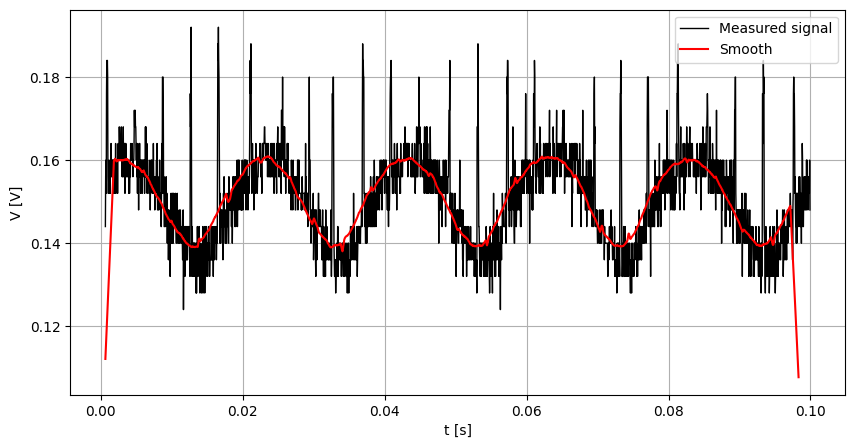

In [531]:
P = 20

fig3, ax3 = plt.subplots(figsize=(10, 5))

ax3.plot(t+0.04996, V, linestyle="-", label="Measured signal")
ax3.plot(t[P:len(t)-P]+0.04916, smooth[P:len(t)-P], color="r", linestyle="-", label="Smooth", linewidth=1.5)

ax3.set_ylabel("V [V]")
ax3.set_xlabel("t [s]")

ax3.legend()
fig3.savefig("Figuren/Signal.pdf")
plt.show()

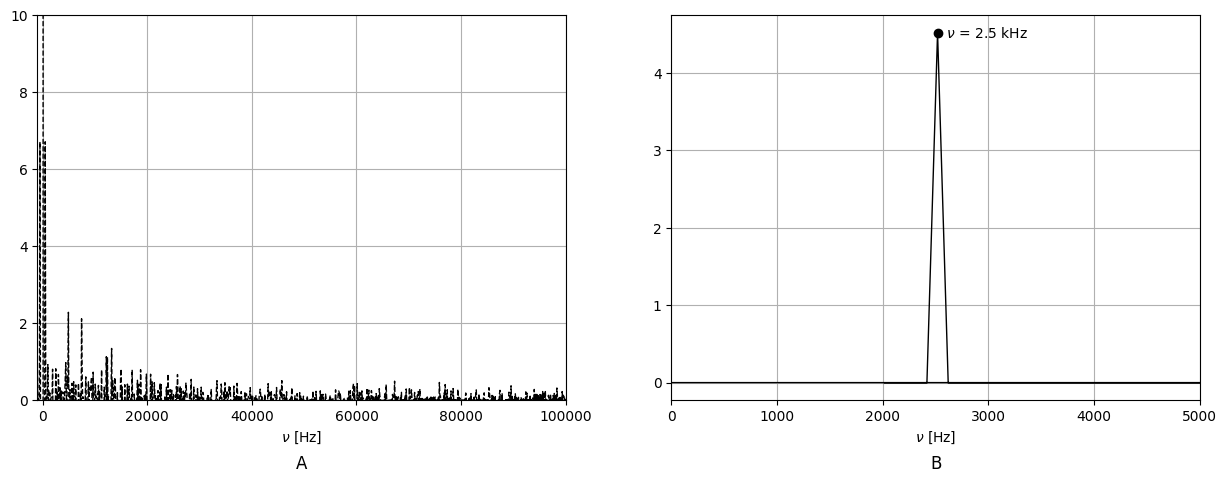

In [532]:
fig4, ax4 = plt.subplots(1, 2, figsize=(15, 5))

sample_rate = 4e-6

spanning_fft = np.real(fft(V))
spanning_fft_smooth = np.real(fft(smooth[P:len(t)-P]))

spanning_fft_smooth = np.real(fft(smooth[P:len(t)-P]))

spanning_fft_smooth[spanning_fft_smooth > 7.5] = 0
spanning_fft_smooth[spanning_fft_smooth < 0] = 0

slice = int(len(spanning_fft_smooth)*0.5)

freq = np.fft.fftfreq(t.size, d=sample_rate)

peaks, _ = find_peaks(spanning_fft_smooth, height=0.1)

ax4[0].plot(freq, spanning_fft)
ax4[1].scatter(freq[P+peaks], spanning_fft_smooth[peaks])
ax4[1].plot(freq[P:len(t)-P], spanning_fft_smooth, linestyle="-")
ax4[0].set_xlim((-1000, 100000))
ax4[0].set_ylim((0, 10))
ax4[1].set_xlim((0, 100000))
ax4[0].set_xlabel("$\\nu$ [Hz]")
ax4[1].set_xlabel("$\\nu$ [Hz]")
ax4[1].set_xlim((0, 5000))
ax4[1].text(2600, 4.45, "$\\nu$ = 2.5 kHz")
ax4[1].set_title('B', y=-0.2)
ax4[0].set_title('A', y=-0.2)
fig4.savefig("Figuren/FFT.pdf")
plt.show()

[ 2518.13053989 -2518.13053989]


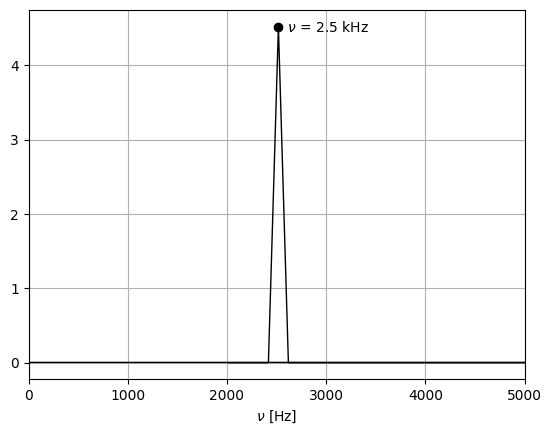

In [533]:
fig5, ax5 = plt.subplots()

sample_rate = 4e-6

spanning_fft = np.real(fft(V))
spanning_fft_smooth = np.real(fft(smooth[P:len(t)-P]))

spanning_fft_smooth = np.real(fft(smooth[P:len(t)-P]))

spanning_fft_smooth[spanning_fft_smooth > 7.5] = 0
spanning_fft_smooth[spanning_fft_smooth < 0] = 0

slice = int(len(spanning_fft_smooth)*0.5)

freq = np.fft.fftfreq(t.size, d=sample_rate)

peaks, _ = find_peaks(spanning_fft_smooth, height=0.1)
print(freq[P+peaks])


ax5.scatter(freq[P+peaks], spanning_fft_smooth[peaks])
ax5.plot(freq[P:len(t)-P], spanning_fft_smooth, linestyle="-")
ax5.set_xlim((0, 5000))

ax5.text(2600, 4.45, "$\\nu$ = 2.5 kHz")
ax5.set_xlabel("$\\nu$ [Hz]")
fig5.savefig("Inner.png", dpi=100)
plt.show()